In [108]:
####################################
############ Question 1
###################################
from random import *

#part a
def card_type():
    r = random()
    if r <= 0.835:
        return "Common"
    elif r <= (0.835 + 0.14):
        return "Rare"
    elif r < (0.835 + 0.14 + 0.025):
        return "Legendary"
    else:
        return -1
    
#part b
pack = int(input("Please enter the packs of card (1 pack = 30 cards) : "))
res = {
    "Common" : 0,
    "Rare" : 0,
    "Legendary" : 0
}
for i in range(pack*30):
    res[card_type()] += 1

print("You have",res["Common"],"Common cards,",res["Rare"],"Rare cards,",res["Legendary"],"Legendary cards.")
    

Please enter the packs of card (1 pack = 30 cards) : 4
You have 101 Common cards, 15 Rare cards, 4 Legendary cards.


In [109]:
####################################
############ Question 2
###################################
from random import random,randint

#part a
def rolldice(n):
    return randint(1,n)

#part b
def rol_dd():
    d_d_types = [20,12,10,8,6,4]
    total = 0
    for i in d_d_types:
        total += rolldice(i)
    return total

#part c
rolls_list = [0]*61
for i in range(1000):
    roll = rol_dd()
    rolls_list[roll] += 1
print("The maximum sum after using monte carlo simulation is",rolls_list.index(max(rolls_list)))

The maximum sum after using monte carlo simulation is 30


Simulation for the company Netflix
Simulation for the company Facebook
Simulation for the company Amazon
Simulation for the company Tesla


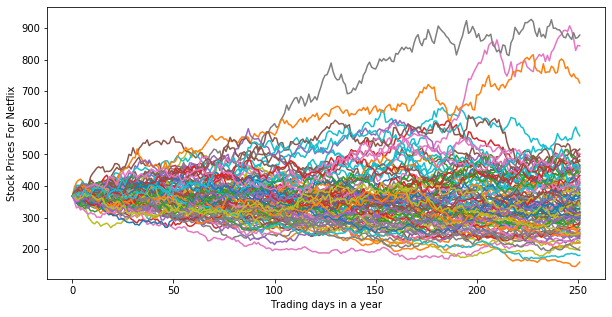

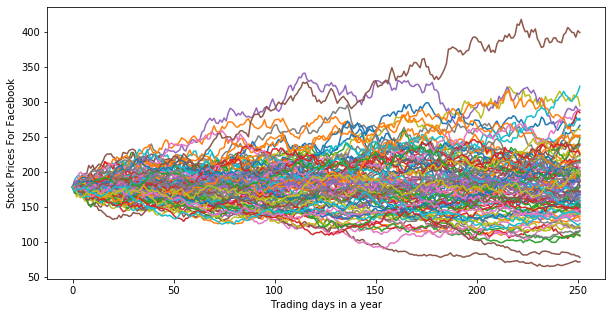

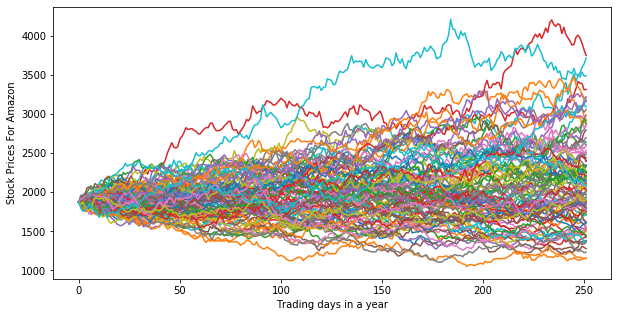

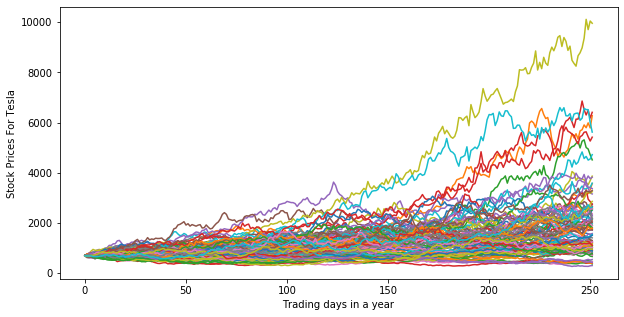

In [60]:
####################################
############ Question 3
###################################
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def simulation(file_name,stock_name,iterations):
    #open file
    data = pd.read_csv(file_name)
    stock_prices = data["Open"]
    #calculate log returns
    log_returns = np.log(1 + stock_prices.pct_change())
    #Calculate Attributes
    u,var,stdev = log_returns.mean(),log_returns.var(),log_returns.std()
    #formula for drift
    drift = u - (0.5 * var)
    t_intervals = 252 # number of trading days for a year
    plt.figure(figsize=(10,5))
    plt.xlabel("Trading days in a year")
    plt.ylabel("Stock Prices For "+stock_name)
    for i in range(iterations):
        Z = norm.ppf(np.random.rand(t_intervals))
        daily_returns = np.exp(drift + stdev * Z)
        S0 = stock_prices.iloc[-1]
        price_list = np.zeros_like(daily_returns)
        price_list[0] = S0
        for t in range(1, t_intervals):
            price_list[t] = price_list[t - 1] * daily_returns[t]

        plt.plot(price_list)


def main():
    iterations = 100
    stocks = {
        "Netflix" : "NFLX.csv",
        "Facebook" : "FB.csv",
        "Amazon" : "AMZN.csv",
        "Tesla" : "TSLA.csv"
    }
    for key,value in stocks.items():
        print("Simulation for the company",key)
        simulation(value,key,iterations)
    
if(__name__ == "__main__"):
    main()

In [94]:
####################################
############ Question 4
###################################
from random import choice

#part a
def monty_hall():
    doors = [0, 1, 0]
    selection = [0,1,2]
    door_selected = choice(selection)
    return  True if doors[door_selected] == 1 else False

#part b
def switch_to_other():
    doors = [0, 0, 1]
    selection = [0,1,2]
    door_selected = choice(selection)
    remaining_doors = selection.pop(door_selected)
    opened_door = 0 if door_selected == 1 else 1
    remove_opened_door = selection.pop(selection.index(opened_door))
    for x in selection:
        return doors[x] == 1


def monte_carlo(n):
    success_count = 0
    switch_success_score = 0
    for i in range(n):
        score = monty_hall()
        switch_score = switch_to_other()
        success_count += score
        switch_success_score += switch_score

    print("Number of plays:",n)
    print("Number of success using monte carlo: ",round((success_count/n)*100,2),"%")
    print("Number of success using switching and monte carlo: ",round((switch_success_score/n)*100,2),"%")

N = 100000
monte_carlo(N)
''' If contestant choses unrevealed door then the probability of winning increases to 67% after many plays using monte carlo'''

Number of plays: 100000
Number of success using monte carlo:  33.28 %
Number of success using switching and monte carlo:  66.59 %
